# Лабораторная работа №4
## Изучение алгоритма обратного распространения ошибки

In [1]:
import math

import matplotlib.pyplot as plt

from itertools import chain

In [2]:
# Функция активации
f = lambda net: (1. - math.exp(-net))/(1. + math.exp(-net))
df = lambda net: 1./2 * (1 - f(net) ** 2)

In [7]:
# Данные по варианту
# Входные данные
x = (-1.,)
# x = (0.3, -0.1, 0.9)


# Целевые значения t/10
t = (0.2, -0.3, 0.1)
# t = (0.1, -0.6, 0.2, 0.7)

# Архитектура
N, J, M = 1, 1, 3
# N, J, M = 3, 3, 4

# Параметры обучения
Nu = 1.
Eps = 1e-5
EPOCH = 300

In [4]:
# Функционирование НС
mseF = lambda T, Y: sum((t - y) ** 2 for t, y in zip(T, Y)) ** (1./2)
netF = lambda W, X: sum(w * x for w, x in zip(W, chain([1.], X)))
out_dltF = lambda net, t: df(net)1./2 * (t - f(net))
inn_dltF = lambda net, Dlt, W: df(net) * sum(w * d for w, d in zip(W, Dlt))
w_dltF = lambda x, Dlt, W: [w + N * d * x for d, w in zip(Dlt, W)]

In [5]:
# На случай если понадобится генерация весов
def gen_weight():
    while True:
        yield 0.

# Создаем веса
def create(layers):
    # Все веса послойно
    W = list()
    
    # Идем по парам значений: (i, i - 1)
    for idx, curr in enumerate(layers[1:]):

        # Веса слоя
        lW = list()

        # Добавляем 1 для веса смещения
        prev = layers[idx] + 1

        # Для каждого нейрона из скрытого слоя
        for _ in range(curr):

            # Создаем вектор весов по количеству нейронов в предыдущем слою с учетом скрытого
            lW.append([e for e, _ in zip(gen_weight(), range(prev))])

        W.append(lW)
    
    return W

def transpose(l):
    return list(map(list, zip(*l)))

def forward(X, W):
    # Записываем вход
    Xs = [(X, None)]

    # Для каждого скрытого слоя вычисляем net и реальный выход
    for lW in W:
        Net = [netF(w, X) for w in lW]
        # Реальный выход промежуточного слоя становится входом след слоя
        X = [f(net) for net in Net]

        # Записываем выход и net
        Xs.append((X, Net))
    
    return Xs

def backward(Xs, T, W):
    # Отдельно обрабатываем выходной слой, получаем все выходы промежуточных слоев
    _, *Xss, (X, Net) = Xs

    # Получаем дельту- выходного слоя
    Dlt = [[out_dltF(net, t) for net, t in zip(Net, T)]]

    # В обратном порядке проходим по входам и весам промежуточных слоев
    for (X, Net), lW in zip(reversed(Xss), reversed(W)):
        Dlt.append([
            inn_dltF(net, Dlt[-1], lw)
            for lw, net
            in zip(transpose(lW), Net)
        ])
    
    # Контейнер для новых весов
    nW = list()

    # Дельты записывали в обратном порядке - разворачиваем
    for dlt, (X, Net), lW in zip(reversed(Dlt), Xs, W):
        # Транспонируем чтобы изменять нужные веса
        lW = transpose(lW)

        # Вычислям изменения весов
        lW = [w_dltF(x, dlt, lw) for lw, x in zip(lW, chain([1.], X))]

        # Записываем транспонированные веса
        nW.append(transpose(lW))
    
    return nW

def pipeline(X, T, arch):
    W = create(arch)
    
    # EPOCH эпох обучения
    for i in range(EPOCH):
        # Вычисляем рез-ты промежуточных слоев
        Xs = forward(X, W)

        # Оцениваем реальный выход крайнего слоя
        *_, (Y, _) = Xs
        E = mseF(T, Y)

        # Промежуточный вывод рез-тов
        yield (i, W, Y, E)

        # Если ошибка достаточно мала - выходим
        if E < Eps:
            return

        # Вычисляем дельты в обратном порядке и корректируем веса в прямом
        W = backward(Xs, T, W)

i=0, E=0.37417, Y=0.000,0.000,0.000
i=1, E=0.28076, Y=0.050,-0.075,0.025
i=2, E=0.21146, Y=0.087,-0.130,0.044
i=3, E=0.16021, Y=0.115,-0.171,0.058
i=4, E=0.12207, Y=0.136,-0.201,0.068
i=5, E=0.09347, Y=0.151,-0.224,0.076
i=6, E=0.07186, Y=0.163,-0.241,0.082
i=7, E=0.05542, Y=0.172,-0.254,0.087
i=8, E=0.04285, Y=0.178,-0.264,0.090
i=9, E=0.03320, Y=0.184,-0.272,0.092
i=10, E=0.02577, Y=0.187,-0.278,0.094
i=11, E=0.02003, Y=0.190,-0.283,0.096
i=12, E=0.01559, Y=0.193,-0.287,0.097
i=13, E=0.01215, Y=0.194,-0.289,0.098
i=14, E=0.00948, Y=0.196,-0.292,0.098
i=15, E=0.00740, Y=0.197,-0.293,0.099
i=16, E=0.00578, Y=0.198,-0.295,0.099
i=17, E=0.00452, Y=0.198,-0.296,0.099
i=18, E=0.00353, Y=0.199,-0.297,0.099
i=19, E=0.00276, Y=0.199,-0.298,0.100
i=20, E=0.00216, Y=0.199,-0.298,0.100
i=21, E=0.00169, Y=0.199,-0.298,0.100
i=22, E=0.00133, Y=0.200,-0.299,0.100
i=23, E=0.00104, Y=0.200,-0.299,0.100
i=24, E=0.00082, Y=0.200,-0.299,0.100
i=25, E=0.00064, Y=0.200,-0.299,0.100
i=26, E=0.00050, Y=0.20

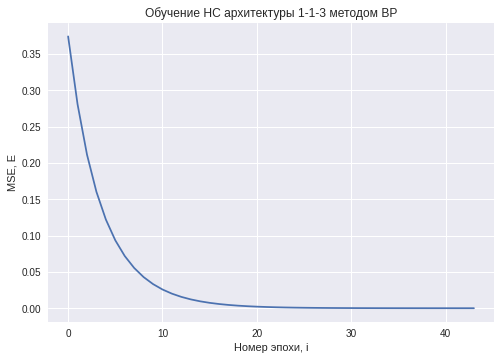

[[[0.12526130573807281, -0.12526130573807281]],
 [[0.4039503028384293, 0.012128558015040947],
  [-0.6165964169383757, -0.01945804235847314],
  [0.19994390887352415, 0.00582651930968584]]]

In [8]:
Es = list()
for (i, W, Y, E) in pipeline(x, t, [N, J, M]):
    print(f"i={i}, E={E:.5f}, Y={','.join(f'{y:.3f}' for y in Y)}")
    Es.append(E)

plt.style.use('seaborn')

X = [i for i, _ in enumerate(Es)]
plt.title(f'Обучение НС архитектуры {N}-{J}-{M} методом BP')
plt.xlabel('Номер эпохи, i')
plt.ylabel('MSE, E')
plt.grid('-')
plt.plot(X, Es)
plt.savefig(f"pics/l4_BP_.png", transparent=False)
plt.show()

W